## Prijenosna funkcija 2. reda

$G(s)=\frac{\omega_N^2}{s^2 + 2*\zeta*\omega_N*s + \omega_N^2}$

In [1]:
# priprema okruženja
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from control import tf, step_response, forced_response, initial_response
import ipywidgets as ipw

In [2]:
# Prijenosna funkcija spremnika

def tf_2ndo(K, wn, zeta):
    return tf([K*wn*wn], [1, 2*zeta*wn, wn*wn])

In [23]:
def plot_2ndo_step(K, wn, zeta):
    # slobodni odziv
    G1 = tf_2ndo(K, wn, zeta)
    
    t, y = step_response(G1)
    plt.figure()
    plt.hlines(1, 0, max(t), colors='g')
    plt.plot(t,y)

    #plt.vlines(T, 0, K, colors='r', linestyles='dashed')
    #plt.plot([0, T],[0, K],'r--')
    plt.grid()    

In [24]:
# definicija prijenosne funkcije, s parametrima K i T

G1 = tf_2ndo(K=1, wn=1, zeta=0.3)

G1


       1
---------------
s^2 + 0.6 s + 1

<IPython.core.display.Javascript object>


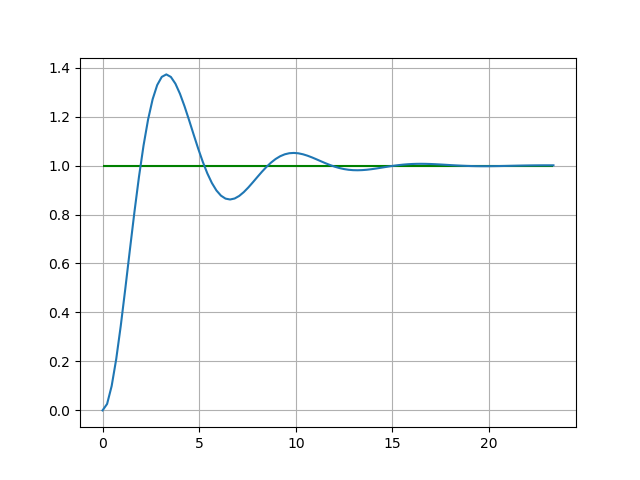

In [26]:
plot_2ndo_step(K=1, wn=1, zeta=0.3)

<IPython.core.display.Javascript object>


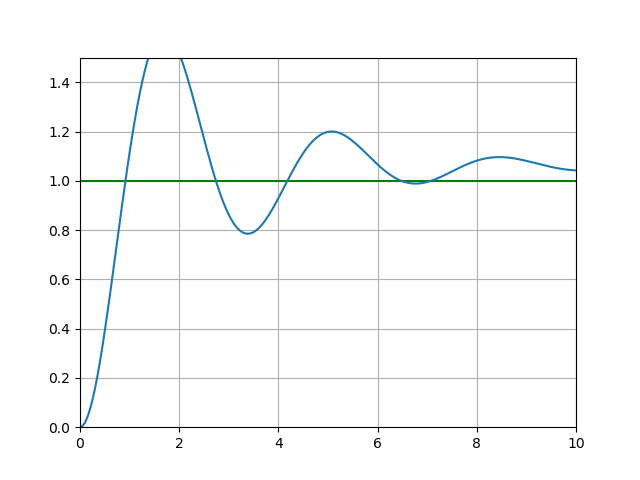

In [28]:
params = {
    'K': 1,
    'wn': 1,
    'zeta': 0.3,
}
tf_label = ipw.Textarea(disabled=False)

def replot(change=None):
    if change and change.name=='value':
        params[change.owner.description] = change.new
    
    K = params['K']
    G1 = tf_2ndo(**params)
    t,y = step_response(G1, np.linspace(0,10,200))    
    
    axes=fig.get_axes()[0]
    axes.clear()
    plt.hlines(1, 0, max(t), colors='g')
    axes.plot(t, y)
    axes.set_xlim(0,10)
    axes.set_ylim(0,1.5)
    axes.grid()
    
    tf_label.value=str(G1)[1:-1]

    
sliders=[
    ipw.FloatSlider(description='K', value=params['K'], min=0.1, max=1.2, step=0.01),
    ipw.FloatSlider(description='wn', value=params['wn'], min=0.1, max=2, step=0.1),
    ipw.FloatSlider(description='zeta', value=params['zeta'], min=0.01, max=2, step=0.1),
]
[slider.observe(replot) for slider in sliders]

fig = plt.figure()
fig.set_label('Odziv sustava')
plt.grid()
plt.show()

replot()
ipw.HBox([
    ipw.VBox(sliders),
    tf_label
])